In [90]:
%reset

In [92]:
import numpy as np
import pandas as pd
 
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(11.7,8.27)})

from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [48]:
#load data 
df = pd.read_csv('/home/bmatore/projects/mlbookcamp-code/data/housing.csv')

In [49]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [50]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [51]:
df = df.drop(['ocean_proximity'], axis=1)

<AxesSubplot:xlabel='median_income', ylabel='Count'>

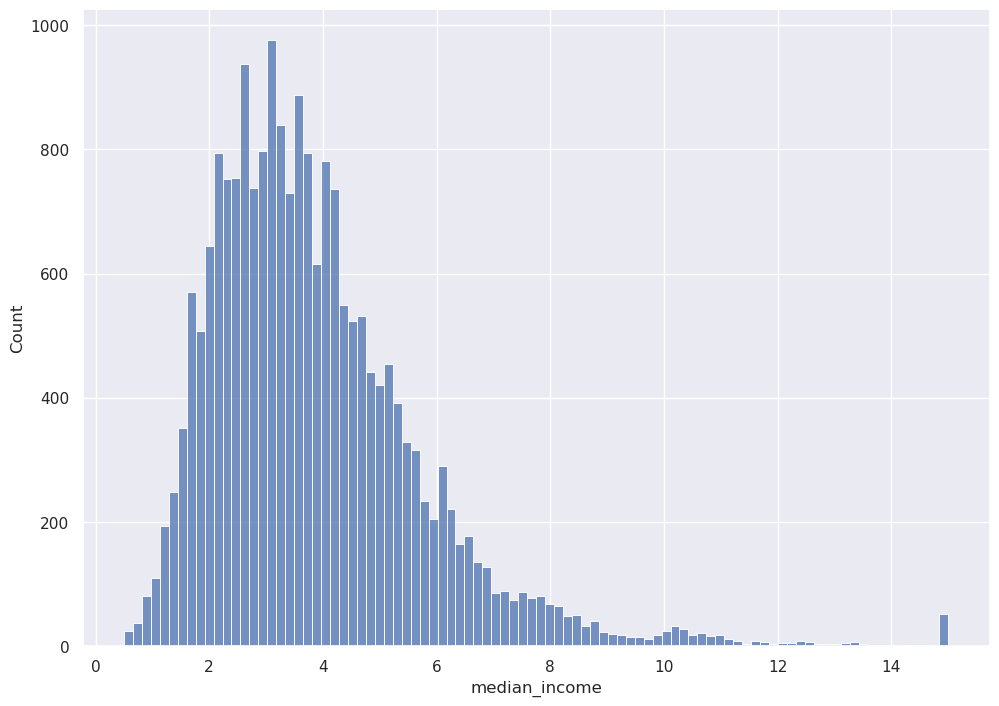

In [52]:
sns.histplot(df.median_income)

### Question 1

In [53]:
# Find a feature with missing values. How many missing values does it have?
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

### Question 2

In [54]:
# What's the median (50% percentile) for variable 'population'?
df.describe().population

count    20640.000000
mean      1425.476744
std       1132.462122
min          3.000000
25%        787.000000
50%       1166.000000
75%       1725.000000
max      35682.000000
Name: population, dtype: float64

### Split the data
Shuffle the initial dataset, use seed 42.
Split your data in train/val/test sets, with 60%/20%/20% distribution.
Make sure that the target value ('median_house_value') is not in your dataframe.
Apply the log transformation to the median_house_value variable using the np.log1p() function.

In [55]:
# split the dataset
np.random.seed(42)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [56]:
y_train_orig = df_train.median_house_value.values
y_val_orig = df_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [57]:
print("df_train shape: {}".format(df_train.shape))
print("df_test shape: {}".format(df_test.shape))
print("df_val shape: {}".format(df_val.shape))

df_train shape: (12384, 8)
df_test shape: (4128, 8)
df_val shape: (4128, 8)


In [58]:
df_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

### Question 3
We need to deal with missing values for the column from Q1.
We have two options: fill it with 0 or with the mean of this variable.
Try both options. For each, train a linear regression model without regularization using the code from the lessons.
For computing the mean, use the training only!
Use the validation dataset to evaluate the models and compare the RMSE of each option.
Round the RMSE scores to 2 decimal digits using round(score, 2)
Which option gives better RMSE?
Options:

With 0
With mean
With median
Both are equally good

In [59]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [60]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [61]:
df_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

In [62]:
base = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
        'total_bedrooms', 'population', 'households', 'median_income']

def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [95]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [64]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)
y_pred = w_0 + X_train.dot(w)

In [65]:
print('train dataset:', round(rmse(y_train, y_pred),2))

train dataset: 0.34


In [66]:
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation dataset', round(rmse(y_val, y_pred),2))

validation dataset 0.33


In [67]:
from statistics import mean


def prepare_X_mean(df_train):
    #df_num = df[base]
    df_train = df_train.fillna(df_train.mean())
    X = df_train.values
    return X

In [68]:
X_train = prepare_X_mean(df_train)
w_0, w = train_linear_regression(X_train, y_train)
y_pred = w_0 + X_train.dot(w)

In [69]:
print('train dataset:', round(rmse(y_train, y_pred),2))

train dataset: 0.34


In [70]:
X_val = prepare_X_mean(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation dataset', round(rmse(y_val, y_pred),2))

validation dataset 0.33


### Question 4
Now let's train a regularized linear regression.
For this question, fill the NAs with 0.
Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
Use RMSE to evaluate the model on the validation dataset.
Round the RMSE scores to 2 decimal digits.
Which r gives the best RMSE?
If there are multiple options, select the smallest r.

In [71]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [72]:
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)

for r in [0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s' %r, round(rmse(y_val, y_pred),2))

 1e-06 0.33
0.0001 0.33
 0.001 0.33
  0.01 0.33
   0.1 0.33
     1 0.33
     5 0.34
    10 0.34


### Question 5
We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
For each seed, do the train/validation/test split with 60%/20%/20% distribution.
Fill the missing values with 0 and train a model without regularization.
For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
Round the result to 3 decimal digits (round(std, 3))
Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.

In [96]:
df1 = pd.read_csv('/home/bmatore/projects/mlbookcamp-code/data/housing.csv') 

df1 = df1.drop(['ocean_proximity'], axis=1)

std_dev_rmse = list()
std_dev_rmse_test = list()
std_dev_rmse_train = list()

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

base = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
        'total_bedrooms', 'population', 'households', 'median_income']

def prepare_X(df1):
    df_num = df1[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X


for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    np.random.seed(s)

    n = len(df1)

    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)

    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffled = df1.iloc[idx]

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()
    
    y_train_orig = df_train.median_house_value.values
    y_val_orig = df_val.median_house_value.values
    y_test_orig = df_test.median_house_value.values

    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)

    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']


    X_train = prepare_X(df_train)
    w_0, w = train_linear_regression(X_train, y_train)
    y_pred = w_0 + X_train.dot(w)
    
    X_val = prepare_X(df_val)
    y_pred = w_0 + X_val.dot(w)
    
    rmse_val = rmse(y_val, y_pred)
    
    #rmse_train  = rmse(y_train, y_pred)
    
    rmse_test = rmse(y_test, y_pred)
    
    std_dev_rmse.append(rmse_val)
    
    std_dev_rmse_test.append(rmse_test)
    
    #std_dev_rmse_train.append(rmse_train)
    
    #print('validation dataset', round(rmse(y_val, y_pred),2))


In [97]:
print(std_dev_rmse)

[0.3388430480531337, 0.3362387255956082, 0.3320912318841851, 0.34051536090368273, 0.3389024066573676, 0.3434866725720329, 0.3451980953099614, 0.33959899274115907, 0.3466230873191734, 0.33659261241793986]


In [98]:
print(np.std(std_dev_rmse))

0.004170771946685087


In [88]:
print(std_dev_rmse_test)

[0.7258236607344661, 0.7201599344322803, 0.7183328468886138, 0.720022014085268, 0.7233385115226951, 0.7204786001367162, 0.7340005871475986, 0.7335889421937513, 0.7284257941669918, 0.7287141501737016]


In [89]:
print(np.std(std_dev_rmse_test))

0.0054407596393184965


In [84]:
np.random.seed(9)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()
    
    
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)
    
y_pred = w_0 + X_train.dot(w)
    
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
    
_rmse = rmse(y_val, y_pred)
    
_rmse_test = rmse(y_test, y_pred)
 
print(_rmse)
print(_rmse_test)


0.5737078798636526
0.5702540615746893
